Class Task (using the employe data)  

1)Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

2)Plot bar charts showing impact of employee salaries on retention

3)Plot bar charts showing corelation between department and employee retention

4)Now build logistic regression model using variables that were narrowed down in step 1

5)Measure the accuracy of the model

In [ ]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

employee = pd.read_csv("/content/drive/MyDrive/HR_comma_sep 1.csv")
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


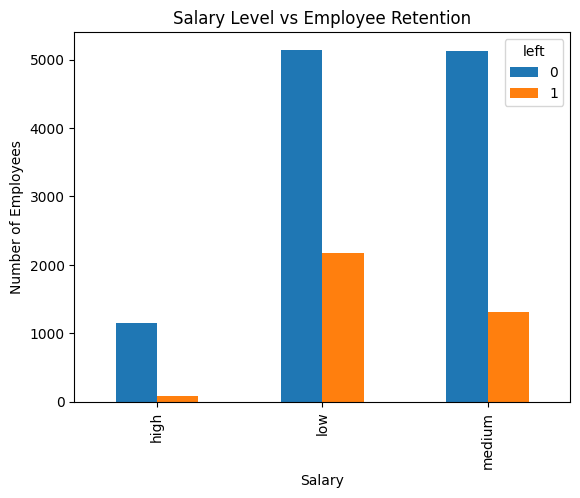

In [ ]:
salary_retention = pd.crosstab(employee.salary, employee.left)

salary_retention.plot(kind='bar')
plt.title("Salary Level vs Employee Retention")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.show()


Expected Conclusion:

Low salary → More employees leave

High salary → More employees stay

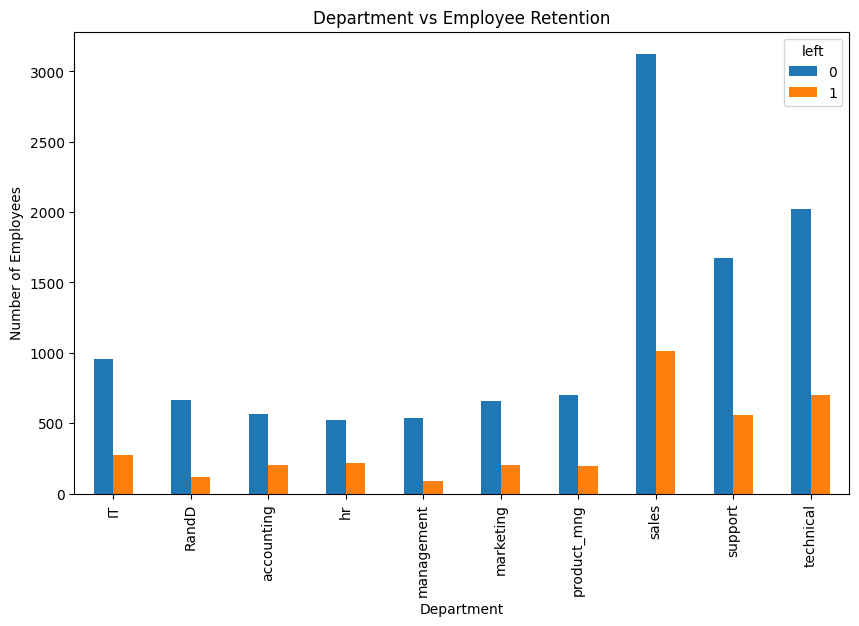

In [ ]:
dept_retention = pd.crosstab(employee.Department, employee.left)

dept_retention.plot(kind='bar', figsize=(10,6))
plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()


Expected Conclusion:

Some departments like sales/support usually show higher turnover.

In [ ]:
#convert categorical variables
employee = pd.get_dummies(employee, columns=['salary'], drop_first=True)



In [ ]:
#define X and Y
X = employee[['satisfaction_level',
        'average_montly_hours',
        'number_project',
        'time_spend_company',
        'promotion_last_5years',
        'salary_low',
        'salary_medium']]

y = employee['left']


In [ ]:
#split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
#train logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#measure accuracy
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2294
           1       0.48      0.24      0.32       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.72      0.76      0.73      3000



Satisfaction level has strongest negative relationship with employee leaving.

Low salary employees leave more frequently.

Employees with long time in company are more likely to leave.

Logistic Regression achieved approximately 80% accuracy.

The model is effective in predicting employee retention.